Alumno: Román Ciro Martin

En este trabajo se realiza un generador de números aleatorios por congruencia lineal con un corto período de manera introductoria, el cual denominaremos como ra(). Luego se realizará un generador con un período mayor llamado ran().
Estos generadores constan de una función lineal a la cual se le aplica una congruencia es decir:

$$
x_{n+1} \equiv (a \cdot x_n + c) \pmod{M}
$$

El cual generará M números pseudo-aleatorios si se cumple que:
c y M son coprimos, es decir, su máximo común divisor es 1.
a-1 es múltiplo de todos los factores primos (q) de M, es decir, $a \equiv 1 \pmod{q}$.
Con este generador se realizarán simulaciones de experimentos y distribuciones estadísticas.

Ejercicio 16 
(a)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def ra(a=57, c=1, M=256): #Defino el generador con los parámetros solicitados
    ra.semilla=((a*ra.semilla+c)%M)
    return ra.semilla/M

[0.23046875, 0.140625, 0.01953125, 0.1171875, 0.68359375]


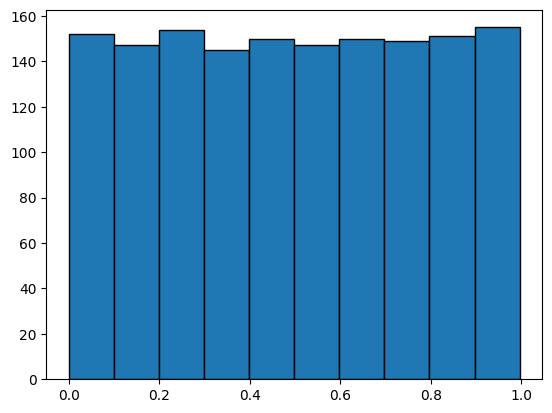

In [4]:
n=1500 #Cantidad de números a generar
ra.semilla=10 #Semilla solicitada
lista_de_prueba=[] #defino la lista
for i in range(n): #Bucle que genera números y los mete en la lista
    lista_de_prueba.append(ra())

print(lista_de_prueba[:5])

plt.hist(lista_de_prueba,edgecolor='black')
plt.show()

In [11]:
#Testeo de período


lista=[] #Defino la lista
cuanto = 0 #Contador

#La idea es armar un bucle que genere valores indefinidamente hasta encontrar una repetición.

while True: #Bucle
    numerito=ra()
    if numerito in lista:
        print('Período de', cuanto)
        break
    else:
        lista.append(numerito) #Añade el número a la lista
        cuanto=cuanto+1 #Conteo de números generados

print(lista[:5]) 



Período de 256
[0.26171875, 0.921875, 0.55078125, 0.3984375, 0.71484375]


Observamos que posee un período $P=256$, demasiado pequeño para realizar un trabajo serio.
Veamos sus momentos y luego comparemos con un generador mejor.
Los momentos teóricos de orden $k$ para nuestra distibución vienen dados por:
$$
\int_{0}^{1} x^k p(x) \, dx = \int_{0}^{1} x^k\, dx  = \left[ \frac{x^{k+1}}{k+1} \right]_{0}^{1}=\frac{1}{k+1} 
$$

Por lo tanto tenemos que:

Los momentos empíricos 1, 3 y 7 respectivamente: 0.401171875 0.18767234683036804 0.09917423321751721 para n=10 números generados
Los momentos empíricos 1, 3 y 7 respectivamente: 0.484453125 0.243148512840271 0.12405638831464044 para n=100 números generados
Los momentos empíricos 1, 3 y 7 respectivamente: 0.498265625 0.2484909987449646 0.12350282956002501 para n=1000 números generados
Los momentos teóricos por otra parte son 0.5 0.25 y 0.125


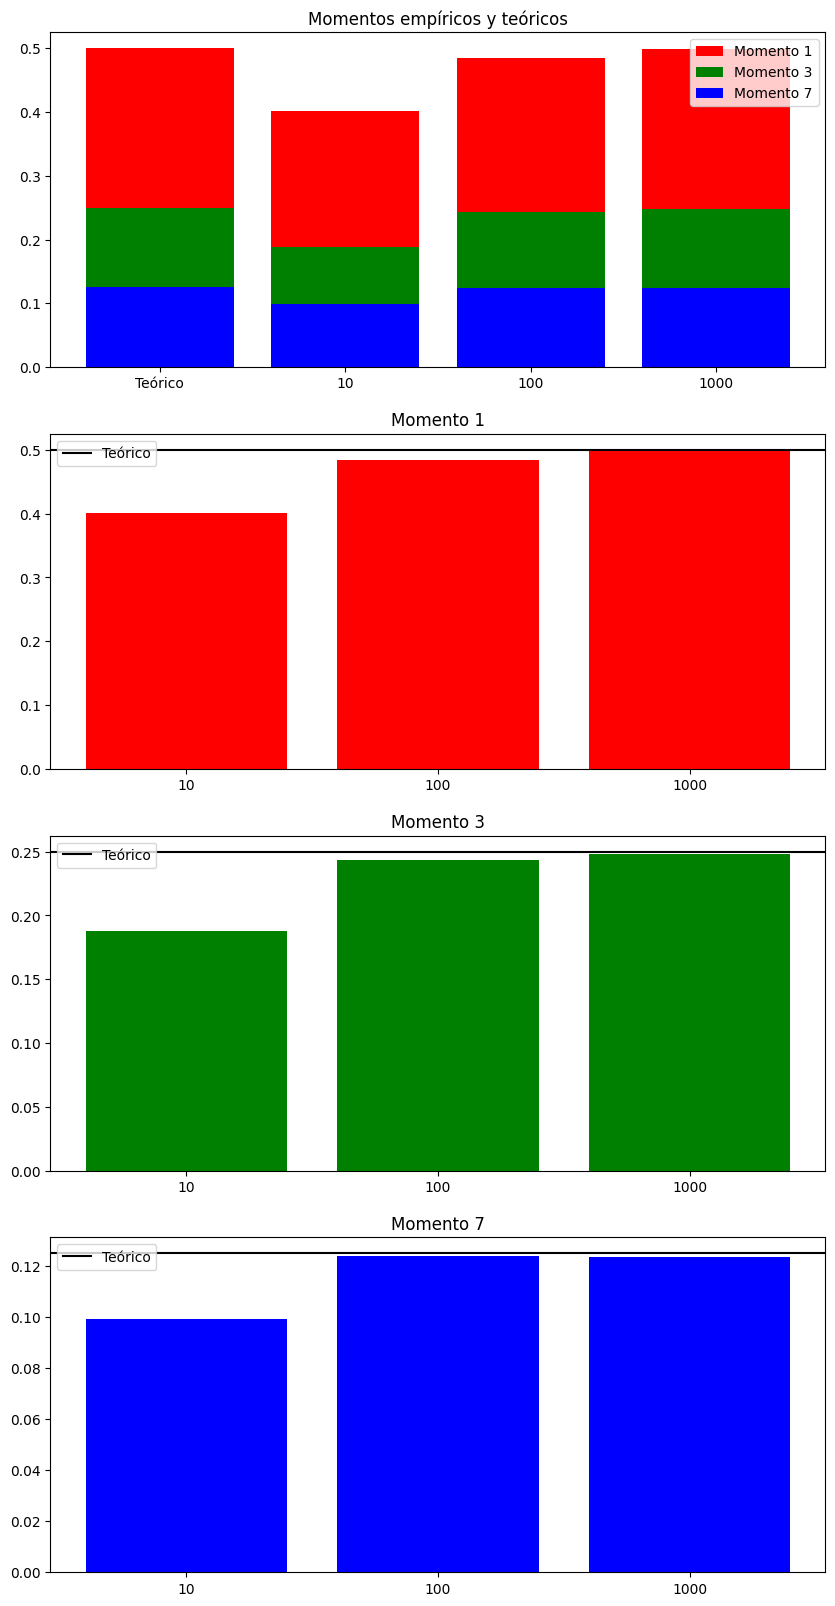

In [6]:
#Primero para n=10
n=10 #Cantidad de números a generar
ra.semilla=10 #Semilla solicitada
lista_pequeña=[] #defino la lista
for i in range(n): #Bucle que genera números y los mete en la lista
    lista_pequeña.append(ra())


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20))  # Creo 4 gráficos


lista_pequeña=np.array(lista_pequeña)

k_1 = (np.sum(lista_pequeña))/len(lista_pequeña) #Momento 1, la media.

k_3 = (np.sum(lista_pequeña**3))/len(lista_pequeña) #Momento 3

k_7 = (np.sum(lista_pequeña**7))/len(lista_pequeña) #Momento 7


teo_1=1/2
teo_3=1/4
teo_7=1/8

ax1.bar('Teórico',teo_1, color='red', label='Momento 1')
ax1.bar('Teórico',teo_3, color='green', label='Momento 3')
ax1.bar('Teórico',teo_7, color='blue', label='Momento 7')


ax1.bar('10',k_1, color='red')
ax1.bar('10', k_3, color='green')
ax1.bar('10', k_7, color='blue')


ax2.axhline(y=teo_1, color='black', label='Teórico')
ax3.axhline(y=teo_3, color='black', label='Teórico')
ax4.axhline(y=teo_7, color='black', label='Teórico')
ax2.bar('10',k_1, color='red')
ax3.bar('10',k_3, color='green')
ax4.bar('10',k_7, color='blue')


print('Los momentos empíricos 1, 3 y 7 respectivamente:' , k_1 , k_3, k_7 , 'para n=10 números generados')

#Ahora para n=100

n=100 #Cantidad de números a generar
ra.semilla=10 #Semilla solicitada
lista_media=[] #defino la lista
for i in range(n): #Bucle que genera números y los mete en la lista
    lista_media.append(ra())


lista_media=np.array(lista_media)

k_1 = (np.sum(lista_media))/len(lista_media) #Momento 1, la media.

k_3 = (np.sum(lista_media**3))/len(lista_media) #Momento 3

k_7 = (np.sum(lista_media**7))/len(lista_media) #Momento 7

ax1.bar('100',k_1, color='red')
ax1.bar('100', k_3, color='green')
ax1.bar('100', k_7, color='blue')

ax2.bar('100',k_1, color='red')
ax3.bar('100',k_3, color='green')
ax4.bar('100',k_7, color='blue')


print('Los momentos empíricos 1, 3 y 7 respectivamente:' , k_1 , k_3, k_7 , 'para n=100 números generados')

#Finalmente para n=1000

n=1000 #Cantidad de números a generar
ra.semilla=10 #Semilla solicitada
lista_grande=[] #defino la lista
for i in range(n): #Bucle que genera números y los mete en la lista
    lista_grande.append(ra())


lista_grande=np.array(lista_grande)

k_1 = (np.sum(lista_grande))/len(lista_grande) #Momento 1, la media.

k_3 = (np.sum(lista_grande**3))/len(lista_grande) #Momento 3

k_7 = (np.sum(lista_grande**7))/len(lista_grande) #Momento 7

ax1.bar('1000',k_1, color='red')
ax1.bar('1000', k_3, color='green')
ax1.bar('1000', k_7, color='blue')

ax2.bar('1000',k_1, color='red')
ax3.bar('1000',k_3, color='green')
ax4.bar('1000',k_7, color='blue')


print('Los momentos empíricos 1, 3 y 7 respectivamente:' , k_1 , k_3, k_7 , 'para n=1000 números generados')


print('Los momentos teóricos por otra parte son' , teo_1, teo_3, 'y', teo_7)

ax1.legend(['Momento 1', 'Momento 3', 'Momento 7'])
ax2.legend(['Teórico'])
ax3.legend(['Teórico'])
ax4.legend(['Teórico'])
ax1.title.set_text('Momentos empíricos y teóricos')
ax2.title.set_text('Momento 1')
ax3.title.set_text('Momento 3')
ax4.title.set_text('Momento 7')

plt.show()


Con más números ha arrojado valores más próximos, finalmente probemos con un generador mejor, es decir, con un período mayor.

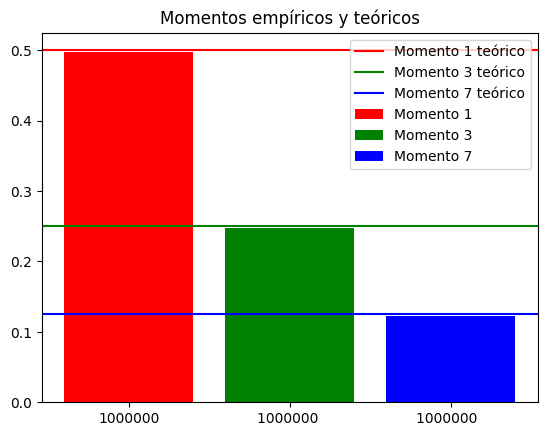

Los momentos empíricos 1, 3 y 7 respectivamente: 0.498045625 0.24804969896316528 0.12305479531339267
Los momentos teóricos por otra parte son 0.5 0.25 0.125


In [7]:
#Cálculo de momentos
#Primero, normalizamos el generador:

def ran(a=1664525, c=1013904223, M=2**32): #Defino el generador con los parámetros óptimos para tener un período de 2**32
    ran.current=((a*ran.current+c)%M) #Busca el atributo seed, y lo cambia
    return ran.current/M



#Generamos la lista:
listorti=[]
n=1000000 #Cantidad de números a generar
ran.current=47 #Semilla
for i in range(n): #Bucle que genera números y los mete en la lista
    listorti.append(ra())

valores = np.array(listorti)

k_1 = (np.sum(valores))/len(valores) #Momento 1, la media.

k_3 = (np.sum(valores**3))/len(valores) #Momento 3

k_7 = (np.sum(valores**7))/len(valores) #Momento 7


teo_1=1/2
teo_3=1/4
teo_7=1/8


plt.axhline(y=teo_1, color='red', label='Momento 1 teórico')
plt.axhline(y=teo_3, color='green', label='Momento 3 teórico')
plt.axhline(y=teo_7, color='blue', label='Momento 7 teórico')

plt.bar('1000000',k_1, color='red', label='Momento 1')
plt.bar('1000000 ', k_3, color='green', label='Momento 3')
plt.bar('1000000  ', k_7, color='blue', label='Momento 7')
plt.legend()
plt.title('Momentos empíricos y teóricos')
plt.show()

print('Los momentos empíricos 1, 3 y 7 respectivamente:' , k_1 , k_3, k_7)
print('Los momentos teóricos por otra parte son' , teo_1, teo_3, teo_7)

Donde observamos buenas aproximaciones a los valores teóricos.

(b)

In [8]:
def ran(a=1664525, c=1013904223, M=2**32): #Defino el generador con los parámetros solicitados
    ran.current=((a*ran.current+c)%M) #Busca el atributo seed, y lo cambia
    return ran.current/M

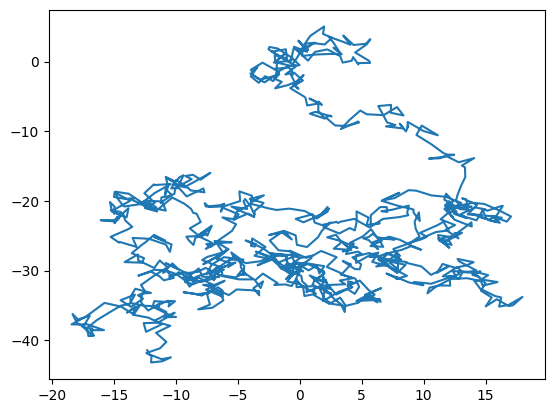

In [9]:
#Si quiero valores en el intervalo [a,b] necesito una transformación lineal y=(b-a)x+a en este caso particular vamos a tener a=-b:
#y=2bx-b será la transformación
ran.current=47
N=1000 #Cantidad de números a generar
b=np.sqrt(2)
lista_x=np.zeros(N)
lista_y=np.zeros(N)
R_valores = np.zeros(N)

for i in range(N): #Bucle que genera números y los mete en una lista
    lista_x[i]=ran()*2*b-b
    lista_y[i]=ran()*2*b-b
plt.show()

#Defino las caminatas
caminata_x = np.cumsum(lista_x)
caminata_y = np.cumsum(lista_y)
plt.plot(caminata_x,caminata_y)
plt.show()


Se nos solicita 10 de estas, por lo que ahora hacemos un lazo que lo haga 10 veces en un mismo gráfico. Además calcularemos la distancia al origen para cada una de ellas.

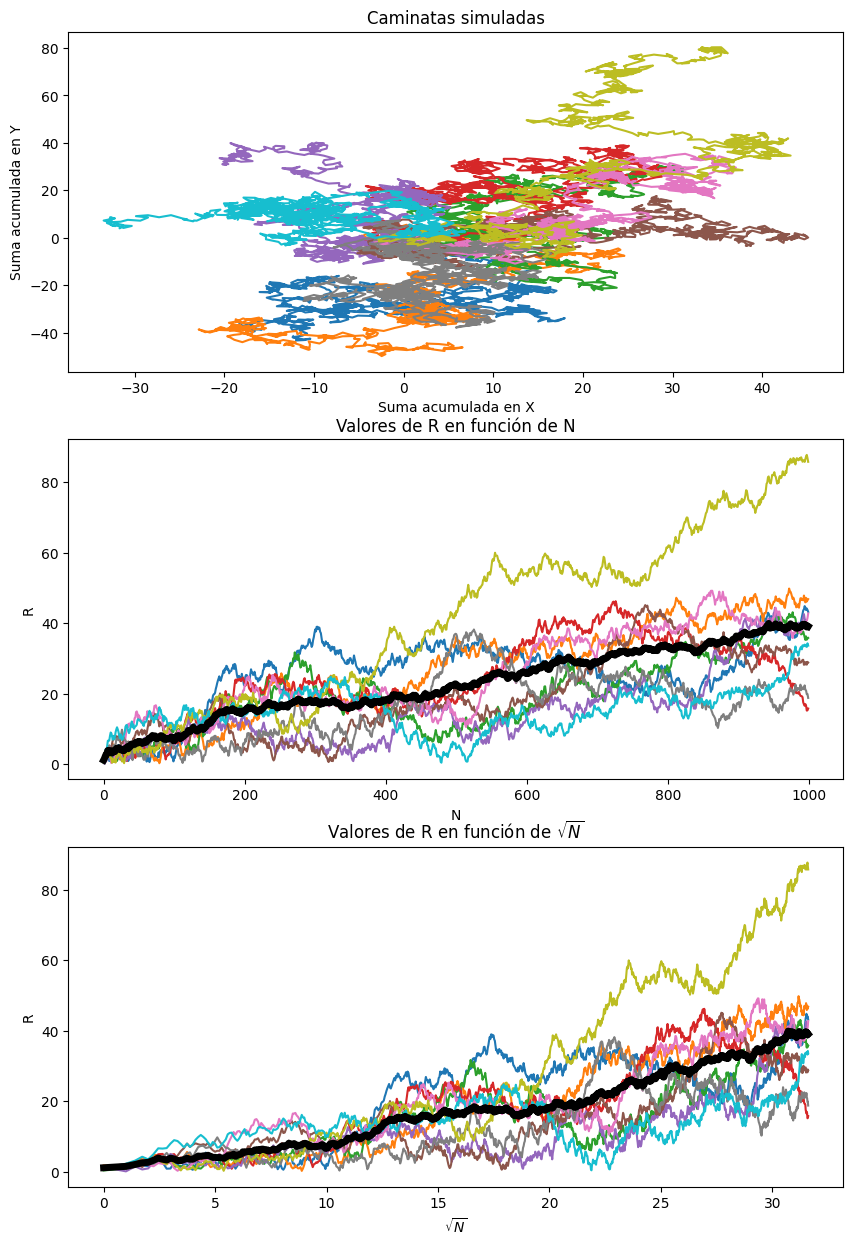

In [10]:
cantidad = 10
N = 1000
ran.current = 47
distancia = np.zeros((cantidad,N))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))  # Creo 3 gráficos

for j in range(cantidad):
    
    b = np.sqrt(2)
    lista_x = np.zeros(N)
    lista_y = np.zeros(N)
    R_valores = np.zeros(N)

    for i in range(N):
        lista_x[i] = ran() * 2 * b - b
        lista_y[i] = ran() * 2 * b - b

    caminata_x = np.cumsum(lista_x)
    caminata_y = np.cumsum(lista_y)
    distancia[j]=np.sqrt(caminata_x**2 + caminata_y**2)

    ax1.plot(caminata_x, caminata_y)  # Gráfico de caminatas

    ax2.plot(range(N), distancia[j])  # Gráfico de R en función de N
    


    ax3.plot(np.sqrt(range(N)), distancia[j])  #Gráfico de R en función de np.sqrt(N)

ax2.plot(distancia.mean(axis=0), lw=5, color='black', label='Valor de expectación') 

ax3.plot(np.sqrt(range(N)) ,distancia.mean(axis=0), lw=5, color='black', label='Valor de expectación')

ax1.set_title('Caminatas simuladas')
ax1.set_xlabel('Suma acumulada en X')
ax1.set_ylabel('Suma acumulada en Y')

ax2.set_title('Valores de R en función de N')
ax2.set_xlabel('N')
ax2.set_ylabel('R')

ax3.set_title('Valores de R en función de $\sqrt{N}$')
ax3.set_xlabel('$\sqrt{N}$')
ax3.set_ylabel('R')
  
plt.show()



Donde podemos observar el promedio como una línea negra y gruesa.